Predicting Titanic Classification

Predictive model that analyzes data on passenger demographics, ticket information, and cabin location to predict which passengers were more likely to survive the shipwreck

# New section

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [105]:
df_titanic = pd.read_csv('Titanic-Dataset.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Collection & Preprocessing

In [106]:
# Data Preprocessing
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

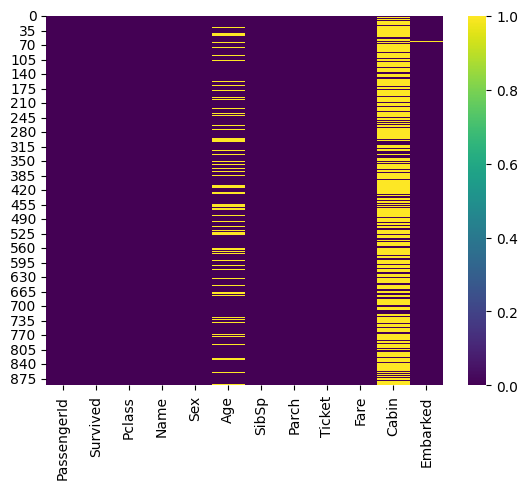

In [107]:
sns.heatmap(df_titanic.isnull(),cmap='viridis')

In [108]:
df_titanic.drop('Cabin',axis=1,inplace=True)

In [109]:
df_titanic.dropna(inplace=True)
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Transformation into a categorical column

In [110]:
df_titanic.replace({'Sex':{'male':0,'female':1}})
df_titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}})
df_titanic.dropna(inplace=True)
#pd.set_option('future.no_silent_downcasting', True)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Data Split into target and features variables

In [111]:
X = df_titanic.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y = df_titanic['Survived']

Train Test Split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [113]:
# Fit the Logistic Regression model
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

X['Sex'] = le_sex.fit_transform(X['Sex'])
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])

X_train['Sex'] = le_sex.transform(X_train['Sex'])
X_train['Embarked'] = le_embarked.transform(X_train['Embarked'])

X_test['Sex'] = le_sex.transform(X_test['Sex'])
X_test['Embarked'] = le_embarked.transform(X_test['Embarked'])

# Fit the RandomForestClassifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))

0.7202797202797203


In [114]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [115]:
y_pred_rf

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

Check for a Random

In [116]:
#user_input = [[3, 0, 22, 1, 0, 7.25, 2]]
user_input = [[1,0,38.0,1,0,71.2833,0]]
user_input_np = np.asarray(user_input)
prediction = rf.predict(user_input_np.reshape(1, -1))
if prediction == 0:
    print('The passenger did not survive')
else:
    print('The passenger survived')


The passenger survived


C:\Users\nazia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
